## Libraries 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(16,10))

In [3]:
import json

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
#!pip install lightgbm
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Model
from pathlib import Path

In [8]:
from keras.optimizers import Adam
from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import LeakyReLU

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

---------------

## Functions

In [11]:
def checkBalance(dataset,target_name):
    print("=======================================")
    print(f"Target Name : {target_name}")
    print("=======================================")
    print("value count")
    print(dataset[target_name].value_counts())
    print("=======================================")
    sns.histplot(x =target_name,data = dataset)
    plt.show()

In [12]:
def check_unique(dataframe,feature_name,target_name):
    # get a list of the unique values 
    uniqueLst = list(dataframe[feature_name].unique())
    # the length of the unique values 
    uniquelength = len(uniqueLst)
    # count the appenrance of each value in the dataset 
    count = dataframe[feature_name].value_counts()
    sorted_count = count.sort_values() 
    # print some information about the feature 
    print(f"Feature : {feature_name}")
    print(f"Number of unique values : {uniquelength}")
    print("=================================")
    print("(Attack'category,count)")
    print(sorted_count)
    print("=================================")
    #sns.histplot(data=, x=feature_name,hue="label", kde=True)
    sns.displot(x =feature_name,hue=target_name,data = dataframe, kind="kde", multiple="stack")
    plt.show()

In [13]:
def count_number_word(lst_of_lst):
    
    wv_lens =[]

    for x in lst_of_lst:
         wv_lens.append(len(x))

    myset = set(wv_lens)

    counts = [wv_lens.count(x)for x in myset]

    df2 = pd.DataFrame({
        "number of words":list(myset),
        "count":counts
    })
    
    return df2


In [14]:
def padd_zeros(row,n_words):
    # get number of words in this row
    length = len(row)
    # create new list that contain the value of the new length 
    new_lst = []
    
    for i in range(n_words):
        if i < length:
            new_lst.append(row[i])
        else:
    
            listofzeros = [0]*100
            new_lst.append(list(listofzeros))   
        
        
    row = new_lst
    
    return row

In [15]:
def prepare_equalWords_data(data,n_words):
    # create a new data frame 
    nemDF = data.copy()
    # pad zeros 
    nemDF['word_vector'] = nemDF['word_vector'].apply(lambda row: padd_zeros(row,n_words)) 
    # recount again 
    nemDF['word_count']  = nemDF['word_vector'].apply(lambda x: len(x))    
    # encode the label to be 0 and 1 instead 1 and 2 
    nemDF['label']  = nemDF['label'].apply(lambda x: int(x-1))    
    
    return nemDF

In [16]:
def visualize_class(data,y):
    plt.figure(figsize=(20,20))
    
    s= [v== y for v in data['label']]
    idxs = np.flatnonzero(s)
    idxs = np.random.choice(idxs, 5, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(1,5, i+1)
        plt.imshow(data['word_vector'][idx])
        plt.axis('off')
        plt.title(y)
    plt.show()
            
def visualize_classes(data,classes):
    for y in classes:
        visualize_class(data,y)
    

In [17]:
def normalize_lst(a):
    lst = np.array(a).reshape(-1,1)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    normalizedlist=scaler.fit_transform(lst)
    return normalizedlist

In [18]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [19]:
import keras.backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [20]:
def evaluation(model,x_train, x_val, y_train, y_val,n_components):
    
    pca = PCA(n_components=n_components,random_state=0)

    x_train_pca = pca.fit_transform(x_train)
    x_val_pca  = pca.transform(x_val)
    
    model.fit(x_train_pca, y_train)
    y_pred=model.predict(x_val_pca)
    f1_score_ = f1_score(y_pred, y_val)
    
    print("F1-Score :",f1_score_)
    print("\n",classification_report(y_val, y_pred))
    
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()

In [21]:
def get_f1_score_4_PCA(X_tr,y_tr,X_val,y_val,model):
    clf =model.fit(X_tr, y_tr)
    pred=clf.predict(X_val)
    f1_score_value = f1_score(pred, y_val) 
    return f1_score_value

In [22]:
def plot_report_confusionMatrix(y_pred,y_true):
    cm = confusion_matrix(y_true,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred))
    plot_report_confusionMatrix(y_pred,y_true)
    print("==============================================================")
    return f1_score(y_true, y_pred) 

def apply_CV_F1(model,X,y):
    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
    print("==============================================================")
    print(f"the f1-score in all iterations       : {nested_score}")
    print(f"the mean of f1-scores                : {nested_score.mean()}")
    print(f"the std  of f1-scores                : {nested_score.std()}")
    print("==============================================================")
    return nested_score.mean() , nested_score.std(),nested_score

--------------

### Models 

In [23]:
# dicision_tree
decTree_CLF = DecisionTreeClassifier(random_state=0)
# XG_boost
xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
# random_forest
rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)
# AdaBoost
ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)
# HistGradientBoostingClassifier
gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)
# CatBoostClassifier
catBoost_CLF = CatBoostClassifier(random_state=0)
# LGBMClassifier
lightGBM_CLF = lgb.LGBMClassifier(random_state=0)

--------

### read the data 

In [24]:
data5_2 = pd.read_csv("data5.csv")
data5_2['word_vector'] = [json.loads(x) for x in data5_2['word_vector']] # list of lists 

In [25]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,5
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,5
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,5
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,5
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,5


### make each row as only one list instead of list of lists 

In [26]:
X_oneLstPerRow = get_words(data5_2,5)

In [27]:
len(X_oneLstPerRow)

123040

In [28]:
data5_2['word_vector']= X_oneLstPerRow
data5_2['word_count']  = data5_2['word_vector'].apply(lambda x: len(x))  

In [29]:
data5_2.head()

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[-0.507, -0.49518, 0.46885, 0.54524, -0.11552,...",1,500
1,1,13,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0,500
2,2,24,"[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842,...",0,500
3,3,21,"[-0.44257, -0.54624, 0.25403, 0.80731, 1.026, ...",0,500
4,4,13,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",1,500


### Reshape the data so it can be used as images 

--------

### Build the model

<h2 style="color:rgb(74, 70, 11);">Part 1</h2>

<h3 style="color:maroon;">Ensemble method</h3>

In [30]:
data5_2

,Unnamed: 0,category,word_vector,label,word_count
0,0,24,"[-0.507, -0.49518, 0.46885, 0.54524, -0.11552,...",1,500
1,1,13,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0,500
2,2,24,"[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842,...",0,500
3,3,21,"[-0.44257, -0.54624, 0.25403, 0.80731, 1.026, ...",0,500
4,4,13,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",1,500
...,...,...,...,...,...
123035,123035,24,"[-0.081545, 0.25175, 0.027983, 0.064531, 0.253...",1,500
123036,123036,7,"[-0.35721, -0.54399, 0.26479, -0.15312, -0.005...",1,500
123037,123037,19,"[-1.5145, 0.9682, 0.34735, 1.0024, 0.042789, 0...",1,500
123038,123038,13,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0,500


In [31]:
train_bag_1_x = []
train_bag_1_y = []

train_bag_2_x = []
train_bag_2_y = []

train_bag_3_x = []
train_bag_3_y = []

# if the row in range 3 , append x , y 
for i in range(len(data5_2)):
    if data5_2['category'][i]== 13:
        train_bag_3_x.append(data5_2['word_vector'][i])
        train_bag_3_y.append(data5_2['label'][i])

# if the row in range 2 , append x , y 

    elif  data5_2['category'][i]== 6 or data5_2['category'][i]==24:
        train_bag_2_x.append(data5_2['word_vector'][i])
        train_bag_2_y.append(data5_2['label'][i])
# if the row in range 1 , append x , y 
    else:
        train_bag_1_x.append(data5_2['word_vector'][i])
        train_bag_1_y.append(data5_2['label'][i])

In [32]:
print(len(train_bag_1_x))
print(len(train_bag_2_x))
print(len(train_bag_3_x))

37358
39780
45902


In [33]:
range_1_train=pd.DataFrame({"x_train":train_bag_1_x , "y_train":train_bag_1_y})
range_2_train=pd.DataFrame({"x_train":train_bag_2_x , "y_train":train_bag_2_y})
range_3_train=pd.DataFrame({"x_train":train_bag_3_x , "y_train":train_bag_3_y})

In [34]:
# # data contains all category except 6, 13 and 24
range_1_train

,x_train,y_train
0,"[-0.44257, -0.54624, 0.25403, 0.80731, 1.026, ...",0
1,"[-1.162, 0.20789, -0.26858, -0.50026, -0.32852...",1
2,"[-0.40747, -0.23971, -0.13692, -0.26816, -0.13...",1
3,"[-0.66947, 0.97598, -0.16577, 0.21344, 0.52528...",0
4,"[-1.3671, -0.14589, 0.2346, 0.90819, -0.056889...",1
...,...,...
37353,"[-0.64981, -0.77387, 0.87098, 0.10963, -0.2748...",1
37354,"[-1.162, 0.20789, -0.26858, -0.50026, -0.32852...",0
37355,"[-1.162, 0.20789, -0.26858, -0.50026, -0.32852...",1
37356,"[-0.35721, -0.54399, 0.26479, -0.15312, -0.005...",1


In [35]:
# data contains category 6 or 24
range_2_train

,x_train,y_train
0,"[-0.507, -0.49518, 0.46885, 0.54524, -0.11552,...",1
1,"[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842,...",0
2,"[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842,...",0
3,"[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842,...",0
4,"[0.42891, -0.24897, 0.19145, -0.10207, -0.5001...",1
...,...,...
39775,"[0.076692, -1.2582, -0.77063, 0.2975, -0.29997...",1
39776,"[0.42891, -0.24897, 0.19145, -0.10207, -0.5001...",1
39777,"[-0.40545, -0.030497, -0.15783, -0.29145, -0.4...",0
39778,"[-0.3488, 0.35351, -0.75489, 0.65763, -0.76447...",1


In [36]:
# data contains category 13
range_3_train

,x_train,y_train
0,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0
1,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",1
2,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0
3,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0
4,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",1
...,...,...
45897,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0
45898,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0
45899,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0
45900,"[0.19911, -0.46156, 0.19674, -1.3298, 0.51805,...",0


In [37]:
# selecting X and Y for the data
x_train_1 = range_1_train['x_train']
y_train_1 = range_1_train['y_train']
# ------------------------------------
x_train_2 = range_2_train['x_train']
y_train_2 = range_2_train['y_train']
# ------------------------------------
x_train_3 = range_3_train['x_train']
y_train_3 = range_3_train['y_train']

In [38]:
# 5000 sample from every DataFrame

sample_1=range_1_train.sample(n = 5000, replace = False)
sample_2=range_2_train.sample(n = 5000, replace = False)
sample_3=range_3_train.sample(n = 5000, replace = False)

In [39]:
#validation for range 1 from datafame 2 and 3

range_1_test=pd.concat([sample_2, sample_3], axis=0)

x_val_1 = range_1_test['x_train']
y_val_1 = range_1_test['y_train']

#validation for range 2 from datafame 1 and 3

range_2_test=pd.concat([sample_1, sample_3], axis=0)

x_val_2 = range_2_test['x_train']
y_val_2 = range_2_test['y_train']

#validation for range 3 from datafame 1 and 2

range_3_test=pd.concat([sample_1, sample_2] ,axis=0)

x_val_3 = range_3_test['x_train']
y_val_3 = range_3_test['y_train']

In [40]:
# converting data to numpy array for traininhg 
x_train_1 = np.array([np.array(i) for i in x_train_1])
x_val_1  = np.array([np.array(i) for i in x_val_1])
# -------------------------------------------------------
x_train_2 = np.array([np.array(i) for i in x_train_2])
x_val_2  = np.array([np.array(i) for i in x_val_2])
# -------------------------------------------------------
x_train_3 = np.array([np.array(i) for i in x_train_3])
x_val_3  = np.array([np.array(i) for i in x_val_3])

## best component for model 1

In [41]:
components=[5,10,20,30,50,70,80,90,100]
models = [decTree_CLF ,xgb_CLF ,rf_CLF ,ada_CLF ,gradiant_boost_CLF ,lightGBM_CLF]
models_names = ['dicision_tree','XG_boost','random_forest','AdaBoost','HistGradientBoostingClassifier','LGBMClassifier']
f1_scores = []
combinations = []

for i in components:
    # create instance from PCA 
    pca = PCA(n_components=i,random_state=0)
    
    # fit PCA 
    X_train_pca =pca.fit_transform(x_train_1)
    X_val_pca   =pca.transform(x_val_1)
    
    for j, m in enumerate(models): 
        f1_score_value = get_f1_score_4_PCA(X_train_pca,y_train_1,X_val_pca,y_val_1,m)
        f1_scores.append(f1_score_value)
        st = f"{models_names[j]} , C:{i}"
        print(f"{models_names[j]} ,f1: {f1_score_value:.3f}, C:{i}")
        combinations.append(st)

dicision_tree ,f1: 0.560, C:5
XG_boost ,f1: 0.586, C:5
random_forest ,f1: 0.629, C:5
AdaBoost ,f1: 0.648, C:5
HistGradientBoostingClassifier ,f1: 0.633, C:5
LGBMClassifier ,f1: 0.613, C:5
dicision_tree ,f1: 0.659, C:10
XG_boost ,f1: 0.660, C:10
random_forest ,f1: 0.628, C:10
AdaBoost ,f1: 0.602, C:10
HistGradientBoostingClassifier ,f1: 0.601, C:10
LGBMClassifier ,f1: 0.600, C:10
dicision_tree ,f1: 0.609, C:20
XG_boost ,f1: 0.619, C:20
random_forest ,f1: 0.631, C:20
AdaBoost ,f1: 0.643, C:20
HistGradientBoostingClassifier ,f1: 0.620, C:20
LGBMClassifier ,f1: 0.607, C:20
dicision_tree ,f1: 0.572, C:30
XG_boost ,f1: 0.637, C:30
random_forest ,f1: 0.641, C:30
AdaBoost ,f1: 0.608, C:30
HistGradientBoostingClassifier ,f1: 0.637, C:30
LGBMClassifier ,f1: 0.636, C:30
dicision_tree ,f1: 0.387, C:50
XG_boost ,f1: 0.639, C:50
random_forest ,f1: 0.642, C:50
AdaBoost ,f1: 0.640, C:50
HistGradientBoostingClassifier ,f1: 0.639, C:50
LGBMClassifier ,f1: 0.640, C:50
dicision_tree ,f1: 0.436, C:70
XG_bo

In [42]:
print("="*100)
print(f"Best number of components for PCA , and best model Based on F1-score : {combinations[np.argmax(f1_scores)]}")
print(f"F1-score : {f1_scores[np.argmax(f1_scores)]}")
print("="*100)

Best number of components for PCA , and best model Based on F1-score : dicision_tree , C:80
F1-score : 0.660620525059666


## best component for model 2

In [43]:
components=[5,10,20,30,50,70,80,90,100]
models = [decTree_CLF ,xgb_CLF ,rf_CLF ,ada_CLF ,gradiant_boost_CLF ,lightGBM_CLF]
models_names = ['dicision_tree','XG_boost','random_forest','AdaBoost','HistGradientBoostingClassifier','LGBMClassifier']
f1_scores = []
combinations = []

for i in components:
    # create instance from PCA 
    pca = PCA(n_components=i,random_state=0)
    
    # fit PCA 
    X_train_pca =pca.fit_transform(x_train_2)
    X_val_pca   =pca.transform(x_val_2)
    
    for j, m in enumerate(models): 
        f1_score_value = get_f1_score_4_PCA(X_train_pca,y_train_2,X_val_pca,y_val_2,m)
        f1_scores.append(f1_score_value)
        st = f"{models_names[j]} , C:{i}"
        print(f"{models_names[j]} ,f1: {f1_score_value:.3f}, C:{i}")
        combinations.append(st)

dicision_tree ,f1: 0.668, C:5
XG_boost ,f1: 0.668, C:5
random_forest ,f1: 0.668, C:5
AdaBoost ,f1: 0.668, C:5
HistGradientBoostingClassifier ,f1: 0.668, C:5
LGBMClassifier ,f1: 0.668, C:5
dicision_tree ,f1: 0.668, C:10
XG_boost ,f1: 0.668, C:10
random_forest ,f1: 0.668, C:10
AdaBoost ,f1: 0.668, C:10
HistGradientBoostingClassifier ,f1: 0.668, C:10
LGBMClassifier ,f1: 0.668, C:10
dicision_tree ,f1: 0.668, C:20
XG_boost ,f1: 0.668, C:20
random_forest ,f1: 0.668, C:20
AdaBoost ,f1: 0.668, C:20
HistGradientBoostingClassifier ,f1: 0.668, C:20
LGBMClassifier ,f1: 0.668, C:20
dicision_tree ,f1: 0.668, C:30
XG_boost ,f1: 0.668, C:30
random_forest ,f1: 0.668, C:30
AdaBoost ,f1: 0.668, C:30
HistGradientBoostingClassifier ,f1: 0.668, C:30
LGBMClassifier ,f1: 0.668, C:30
dicision_tree ,f1: 0.639, C:50
XG_boost ,f1: 0.668, C:50
random_forest ,f1: 0.668, C:50
AdaBoost ,f1: 0.668, C:50
HistGradientBoostingClassifier ,f1: 0.668, C:50
LGBMClassifier ,f1: 0.668, C:50
dicision_tree ,f1: 0.668, C:70
XG_bo

In [44]:
print("="*100)
print(f"Best number of components for PCA , and best model Based on F1-score : {combinations[np.argmax(f1_scores)]}")
print(f"F1-score : {f1_scores[np.argmax(f1_scores)]}")
print("="*100)

Best number of components for PCA , and best model Based on F1-score : random_forest , C:5
F1-score : 0.6682647489679052


## best component for model 3

In [45]:
components=[5,10,20,30,50,70,80,90,100]
models = [decTree_CLF ,xgb_CLF ,rf_CLF ,ada_CLF ,gradiant_boost_CLF ,lightGBM_CLF]
models_names = ['dicision_tree','XG_boost','random_forest','AdaBoost','HistGradientBoostingClassifier','LGBMClassifier']
f1_scores = []
combinations = []

for i in components:
    # create instance from PCA 
    pca = PCA(n_components=i,random_state=0)
    
    # fit PCA 
    X_train_pca =pca.fit_transform(x_train_3)
    X_val_pca   =pca.transform(x_val_3)
    
    for j, m in enumerate(models): 
        f1_score_value = get_f1_score_4_PCA(X_train_pca,y_train_3,X_val_pca,y_val_3,m)
        f1_scores.append(f1_score_value)
        st = f"{models_names[j]} , C:{i}"
        print(f"{models_names[j]} ,f1: {f1_score_value:.3f}, C:{i}")
        combinations.append(st)

dicision_tree ,f1: 0.000, C:5
XG_boost ,f1: 0.530, C:5
random_forest ,f1: 0.000, C:5
AdaBoost ,f1: 0.000, C:5
HistGradientBoostingClassifier ,f1: 0.000, C:5
LGBMClassifier ,f1: 0.000, C:5
dicision_tree ,f1: 0.000, C:10
XG_boost ,f1: 0.655, C:10
random_forest ,f1: 0.000, C:10
AdaBoost ,f1: 0.000, C:10
HistGradientBoostingClassifier ,f1: 0.000, C:10
LGBMClassifier ,f1: 0.000, C:10
dicision_tree ,f1: 0.000, C:20
XG_boost ,f1: 0.666, C:20
random_forest ,f1: 0.000, C:20
AdaBoost ,f1: 0.000, C:20
HistGradientBoostingClassifier ,f1: 0.616, C:20
LGBMClassifier ,f1: 0.660, C:20
dicision_tree ,f1: 0.000, C:30
XG_boost ,f1: 0.593, C:30
random_forest ,f1: 0.000, C:30
AdaBoost ,f1: 0.000, C:30
HistGradientBoostingClassifier ,f1: 0.400, C:30
LGBMClassifier ,f1: 0.629, C:30
dicision_tree ,f1: 0.000, C:50
XG_boost ,f1: 0.350, C:50
random_forest ,f1: 0.000, C:50
AdaBoost ,f1: 0.000, C:50
HistGradientBoostingClassifier ,f1: 0.084, C:50
LGBMClassifier ,f1: 0.496, C:50
dicision_tree ,f1: 0.000, C:70
XG_bo

In [46]:
print("="*100)
print(f"Best number of components for PCA , and best model Based on F1-score : {combinations[np.argmax(f1_scores)]}")
print(f"F1-score : {f1_scores[np.argmax(f1_scores)]}")
print("="*100)

Best number of components for PCA , and best model Based on F1-score : XG_boost , C:20
F1-score : 0.6659551760939166


## building models

In [59]:
model_1= DecisionTreeClassifier(random_state=0)

In [54]:
model_2= RandomForestClassifier(random_state=0)

In [55]:
model_3= xgb.XGBClassifier(random_state=0)

## evaluation models

F1-Score : 0.660620525059666

               precision    recall  f1-score   support

           0       0.64      0.32      0.43      4968
           1       0.55      0.83      0.66      5032

    accuracy                           0.57     10000
   macro avg       0.60      0.57      0.54     10000
weighted avg       0.60      0.57      0.54     10000



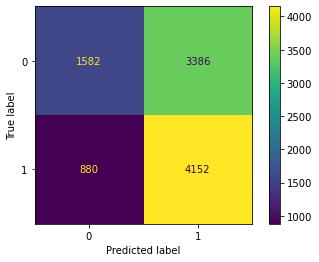

In [60]:
evaluation(model_1,x_train_1,x_val_1,y_train_1,y_val_1,80)

F1-Score : 0.6682647489679052

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4982
           1       0.50      1.00      0.67      5018

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.34     10000



C:\Users\Shrief\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shrief\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shrief\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


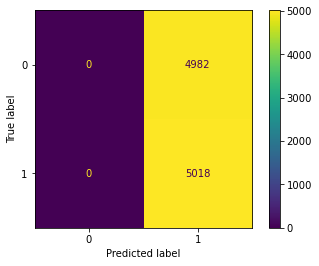

In [61]:
evaluation(model_2,x_train_2,x_val_2,y_train_2,y_val_2,5)

F1-Score : 0.6659551760939166

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5008
           1       0.50      1.00      0.67      4992

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



C:\Users\Shrief\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shrief\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shrief\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


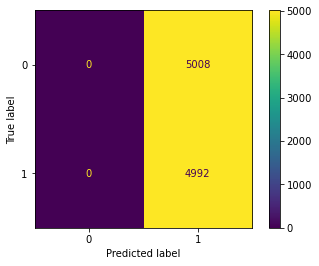

In [62]:
evaluation(model_3,x_train_3,x_val_3,y_train_3,y_val_3,20)

## References 

[1] https://www.csmining.org/cdmc2021/index.php?id=5

[2] https://keras.io/api/applications/